# Reaction flux fit

In [1]:
import alloregfit as arf
import pandas as pd

Load data and model:

In [2]:
data_dir = "C:/Users/user/polybox/MASTER/THESIS/2_new_simmer_test/"
results = pd.read_pickle(data_dir+"fit_1_candidates.pickle")
fluxes_sd = pd.read_excel(data_dir+"fluxes.xlsx",sheetname=1,index_col="name")

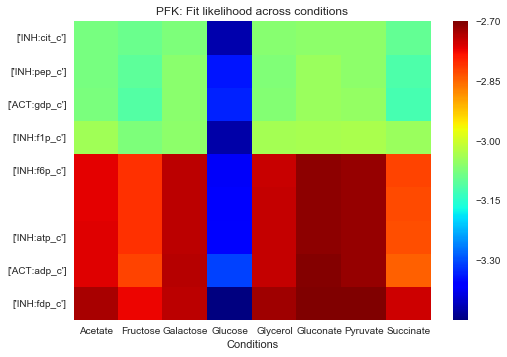

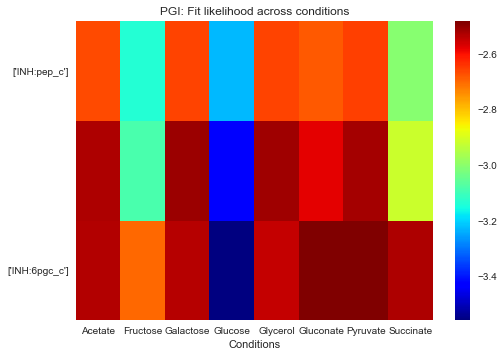

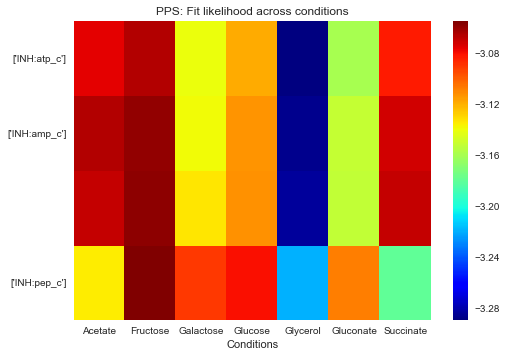

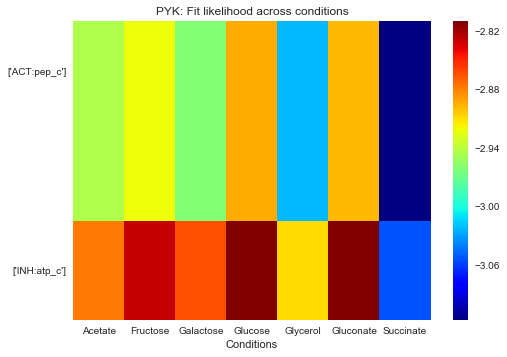

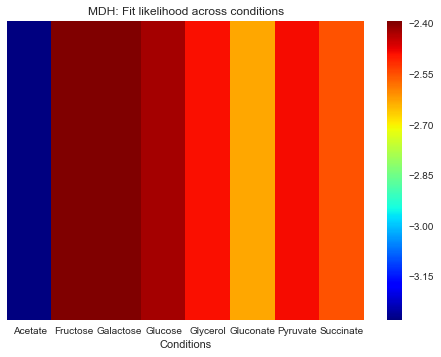

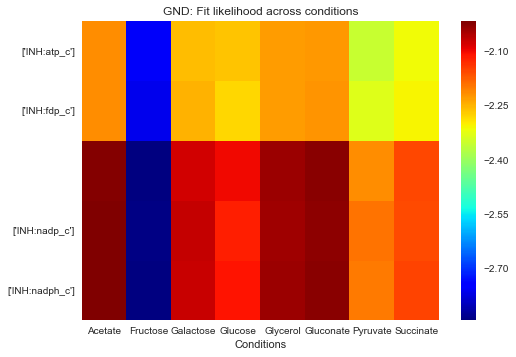

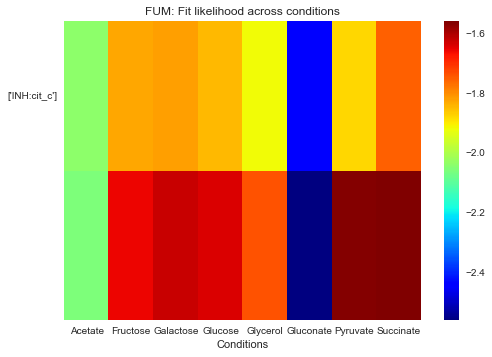

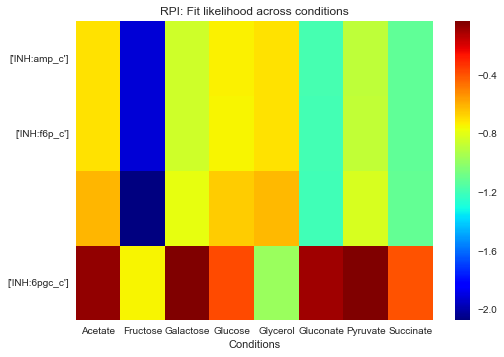

In [3]:
for rxn in list(results['rxn_id'].drop_duplicates()):
    arf.heatmap_across_conditions(results,rxn)

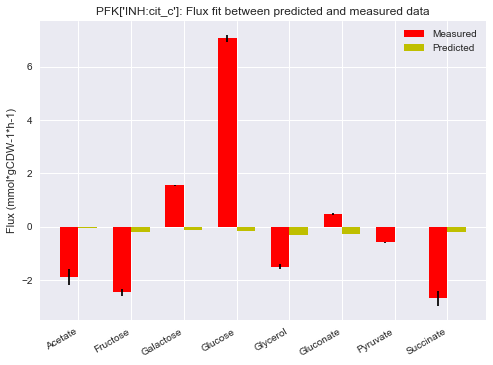

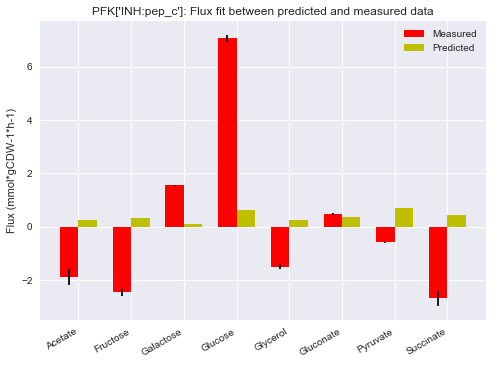

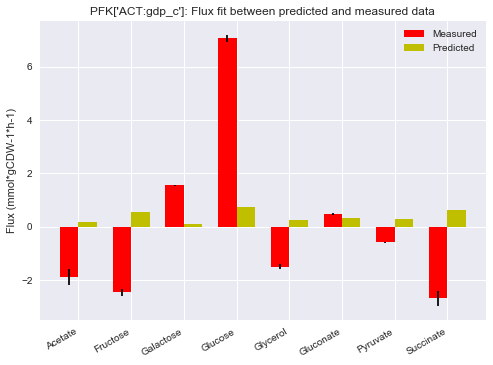

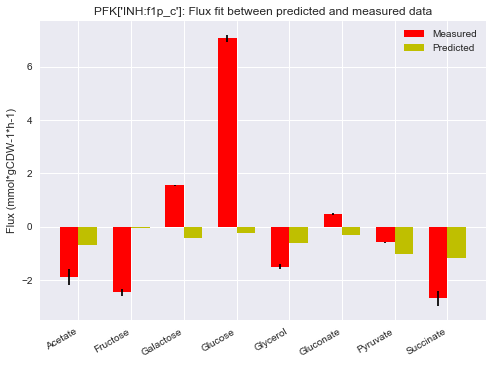

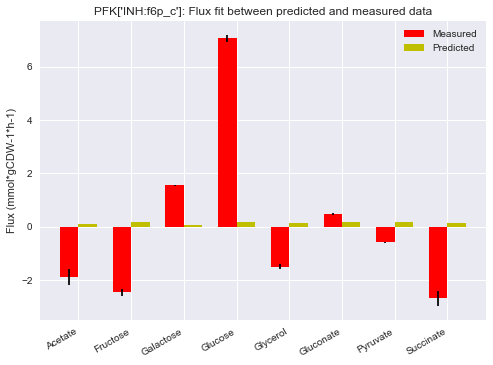

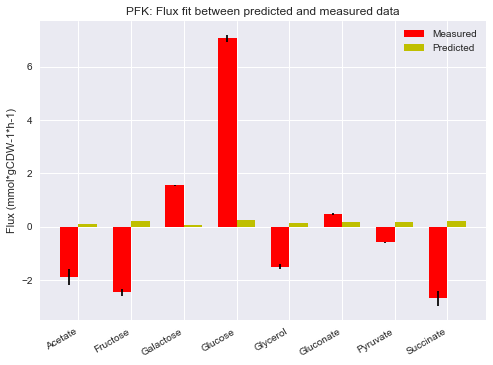

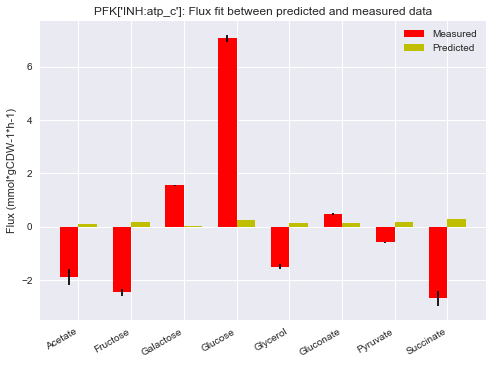

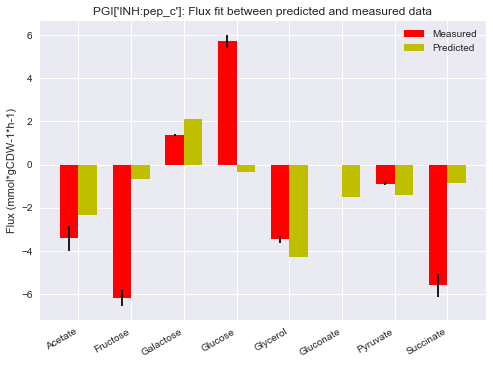

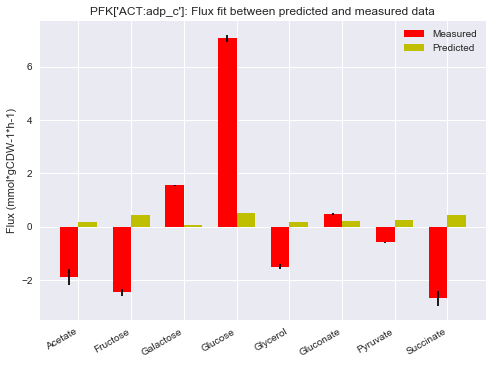

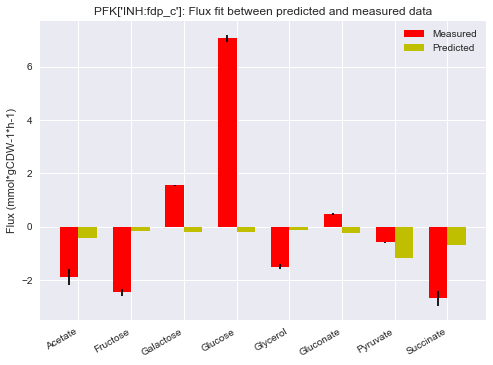

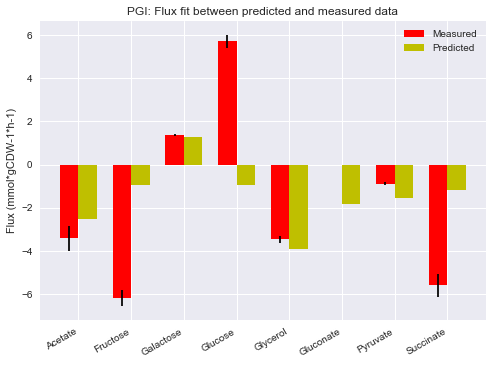

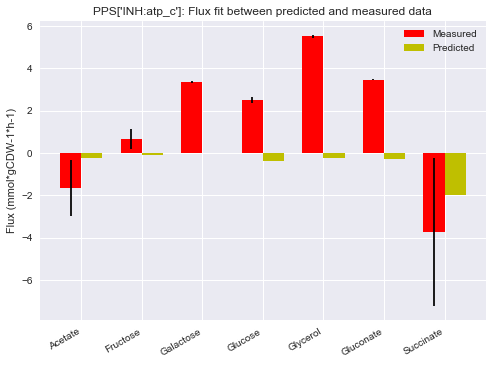

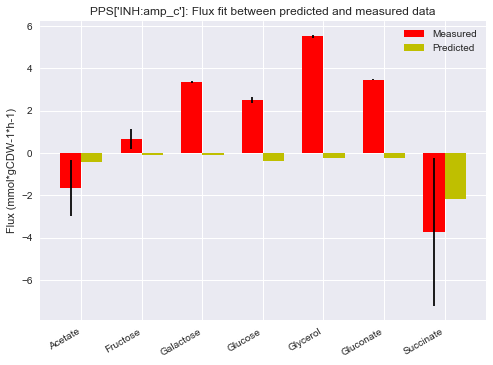

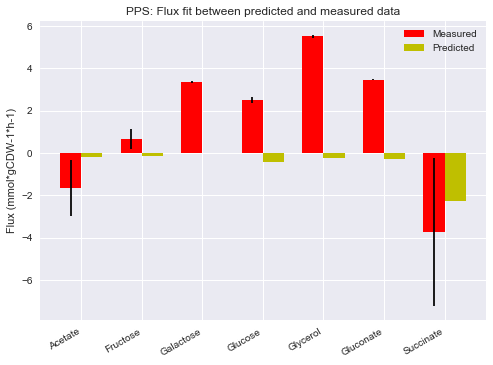

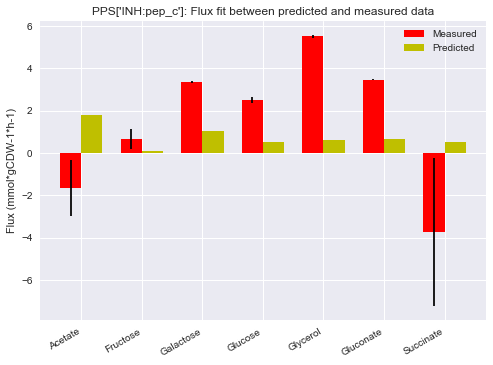

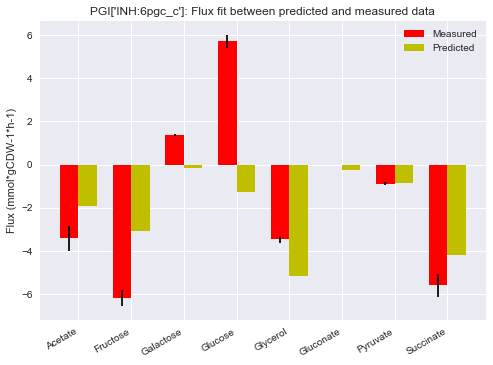

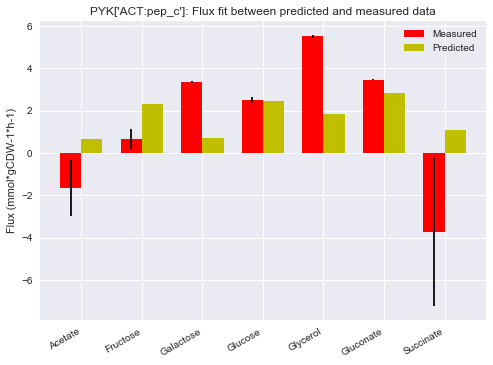

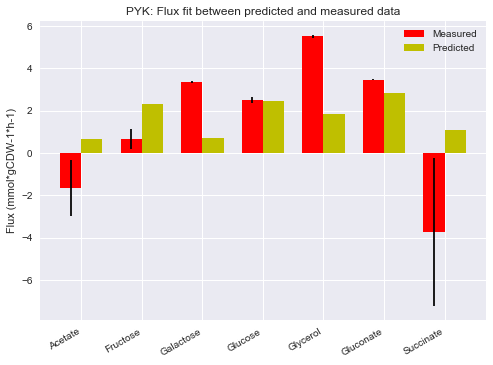

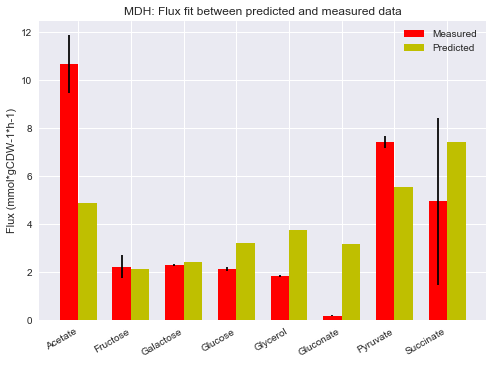

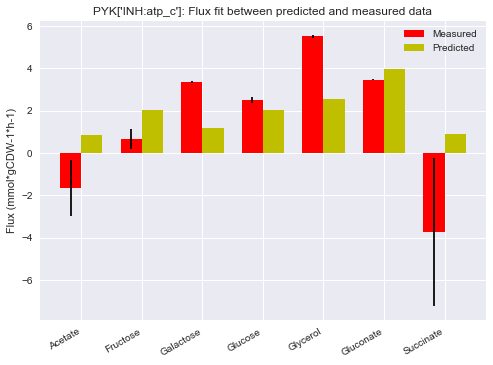

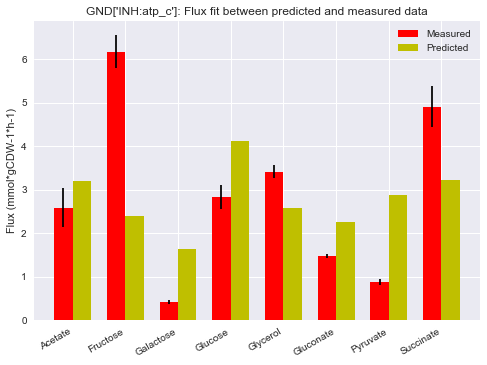

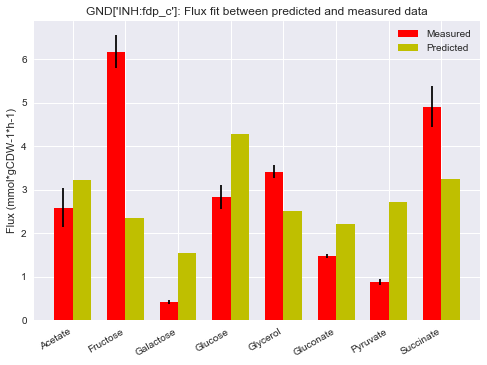

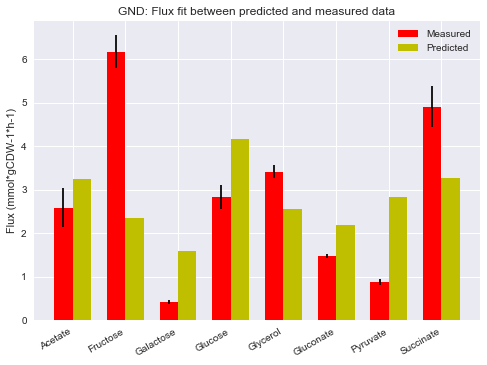

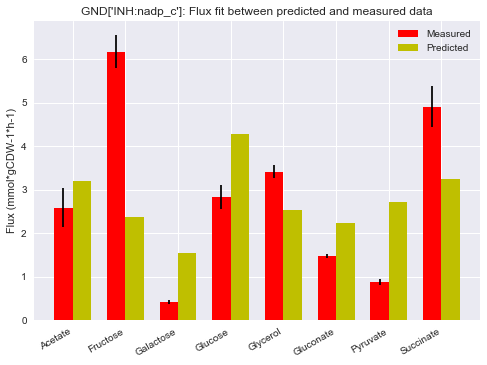

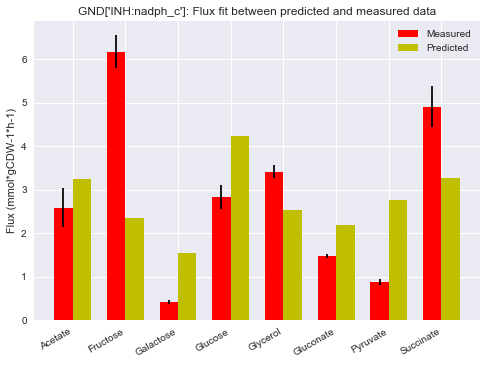

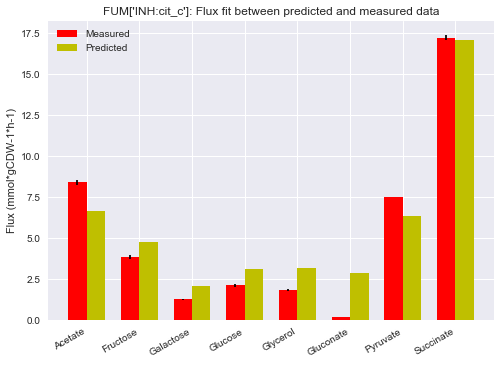

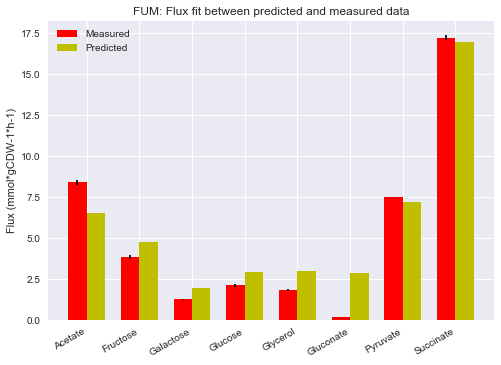

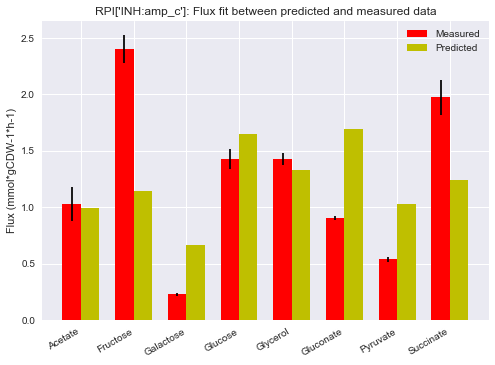

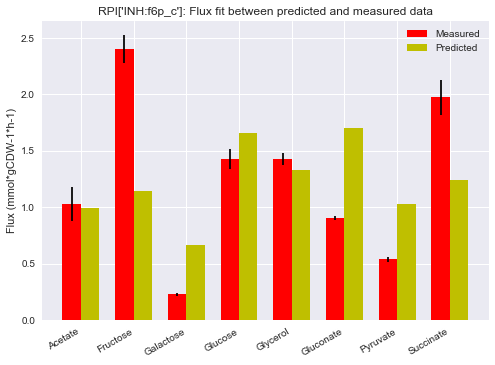

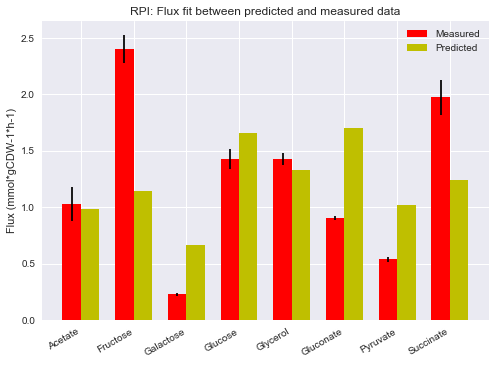

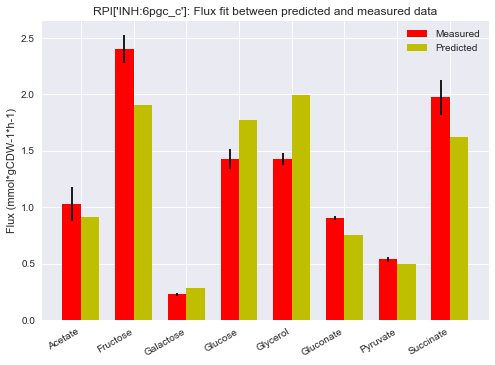

In [4]:
for i in list(results.index):
    arf.plot_fit(i,results,fluxes_sd)

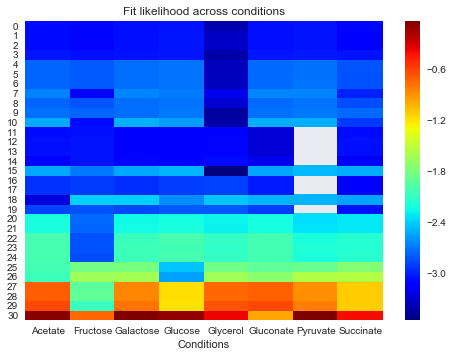

In [5]:
arf.heatmap_across_conditions(results)